In [2]:
library(forecast)

In [3]:
dataset = read.csv("../../dengueData/SanJuan/san_juan_training_data.csv")
dataset

season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases
1990/1991,1,1990-04-30,0,0,0,0,4,0,4
1990/1991,2,1990-05-07,0,0,0,0,5,0,5
1990/1991,3,1990-05-14,0,0,0,0,4,0,4
1990/1991,4,1990-05-21,0,0,0,0,3,0,3
1990/1991,5,1990-05-28,0,0,0,0,6,0,6
1990/1991,6,1990-06-04,1,0,0,0,1,0,2
1990/1991,7,1990-06-11,0,0,0,0,4,0,4
1990/1991,8,1990-06-18,0,0,0,0,5,0,5
1990/1991,9,1990-06-25,2,0,0,0,8,0,10
1990/1991,10,1990-07-02,0,0,0,1,5,0,6


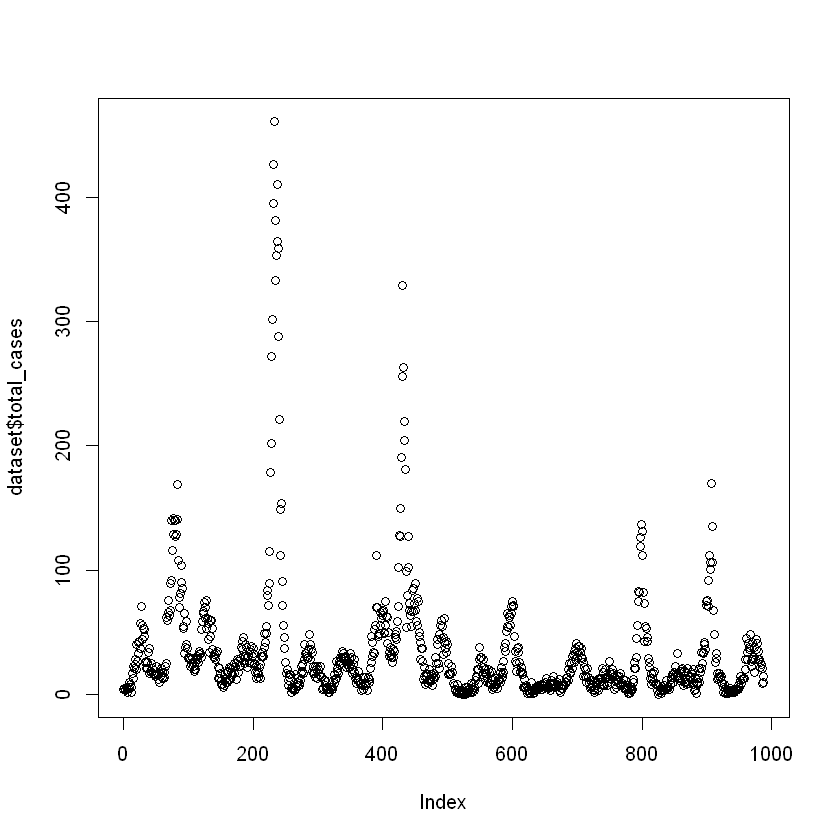

In [4]:
plot(dataset$total_cases)

In [5]:
window_size = 4
split_index = floor(0.7 * nrow(dataset))
lag_weeks = 3
train = dataset$total_cases[1:(split_index+window_size)]
test = dataset$total_cases[(split_index+window_size+lag_weeks):(nrow(dataset))]

length(train)
length(test)

[1] 695

[1] 291

In [6]:
endIndex = length(test)
trainIndex = length(train)

predictions = numeric(0)
for (index in 1:endIndex){
# for(index in 1:10) {
    fit <- auto.arima(dataset$total_cases[1:trainIndex+index])
    fcast <- forecast(fit, h=3)
    forecasted_data <- data.frame(fcast)
    predictions[index] <- forecasted_data$Point.Forecast[3]
}

In [7]:
length(predictions)

predictions

[1] 291

[1]  37.2611326  26.9399308  38.5855493  43.0838685  31.5247852  29.1118996
  [7]  40.9343368  39.4096396  38.3037743  33.2998566  28.7138256  39.1684604
 [13]  27.2879699  24.5585814  11.2403055  23.0178001  13.7479586  19.7875476
 [19]  14.2510614   7.9044570  24.0747619  12.6805593  14.9209854   7.9558868
 [25]  11.0028683   4.5705581   5.6693320   8.1144793  11.0452592   3.2093150
 [31]   2.5787931   2.6446291   6.1178341  11.3907490   5.8663113   4.7702189
 [37]   2.2130660  13.7479521  13.4810383   8.8089008  13.6766179  13.1154296
 [43]   6.9020631  23.6162857  17.8700537   4.9460773   7.6888137  22.3366196
 [49]  12.5177320  13.0467489   6.7395864  14.3466434  10.4232507  12.2408298
 [55]  31.0602481   9.4665438  18.5744141  16.8525692  14.6393679  21.9016200
 [61]  15.7503359  -0.0765616  16.9459868   4.4167716   3.8543866  14.6389340
 [67]  15.3451702  10.5060612   9.4678653  16.7401371  17.4059450   4.4303356
 [73]   6.8857152   8.7100182   9.0349633  13.8051661  12.0000000   3.1994579
 [79]   3.7781355  11.4758566   2.0568188   4.9032248   7.6955101  -0.6088869
 [85]   1.0000000   5.0072729   1.5482935   7.2495660   3.1068716   4.5404011
 [91]  12.1947182  13.9980050  25.1823122  28.0904289  19.1305181  32.5473561
 [97]  49.2568150  59.1357992  80.4596657  85.3056333  81.7120557 139.8276567
[103] 118.2024311 140.7181027 130.2135670 105.4261901  72.0143589  69.9172566
[109]  34.0566661  57.9119828  56.5842437  51.7153728  43.6522055  40.7397022
[115]  24.6542258  19.3037434  27.7996047  13.7253347  16.6294720   6.0353686
[121]  13.3332957  10.2328563  18.2241758  20.3141529   6.3782631   8.6639043
[127]   9.6967481   0.5911187   7.8941339   7.2228220  -2.4648313   1.7876396
[133]   3.7234875   3.0901654   0.2900585   3.4644101   3.1865102   3.0748250
[139]   8.5252976   2.1131876   5.3937378  13.4032413   3.4249713   4.4834765
[145]   6.1613853   6.0668084   3.2796888   3.7010305   9.3764356  16.8088617
[151]  12.3995945  17.6609006   8.4422931  17.5986166  19.4092996  14.4560966
[157]  25.7653969  15.6282610  38.5252545  11.0151649  10.8794145  12.3008159
[163]  14.0275535  18.2700639  20.2731043  20.9054278   9.4011753  23.2672463
[169]   2.9377545  21.8512485   9.1815932  12.0364938   8.9542907   6.8100090
[175]  25.3122308   8.5039128   7.4601722  15.5588177  14.5167218  15.5950572
[181]  19.1553764  15.8515514  10.4826151  22.2915729   5.1482145   0.5535612
[187]  16.7947413   1.8309358  -1.1467816  13.1858980   8.3083289  14.9905340
[193]   9.7507798  24.9866420  18.6225184  21.7599989  39.4597496  23.1313486
[199]  36.9632742  33.9395357  43.0361038  44.0917547  34.6811404  84.0659957
[205]  79.7617081  76.6563709  97.7282434  65.3548242 123.7504832 110.3097581
[211]  98.6332187 194.9047765 136.5828395  97.1481010  53.0561620  37.5524607
[217]  40.7382644  15.3228343  29.1496056  23.7206202  11.2005779   7.6570640
[223]   9.9844145  17.0188376  29.3178539  13.0410113   3.0637188  -0.6304609
[229]   2.9111449   0.2092164   5.2061326   9.0820293   5.3782110  -2.1169130
[235]   1.5224055   3.0545161   3.9463952   3.3484083   0.5681283   2.8246505
[241]  10.5603351   7.4844019   9.1051457   7.3070211   8.7376268   6.4091689
[247]   6.4854129   7.3022993   8.1607836   7.0505832   8.0187221   7.9921749
[253]   7.7739898  10.1889729   9.2176819  17.3443120  14.3890213  11.8747643
[259]   9.0000000  12.0000000  13.0000000  13.0000000  13.0000000  20.5269515
[265]  27.9632531  45.0000000  28.0000000  34.0000000  41.0000000  36.0000000
[271]  38.0000000  48.0000000  27.0000000  23.0000000  28.0000000  42.0000000
[277]  30.0000000  18.0000000  38.0000000  28.0000000  36.0000000  44.0000000
[283]  41.0000000  34.5256553  28.0000000  27.9520437  21.7530249  26.4126575
[289]  23.5391516   8.6041732  21.9805720

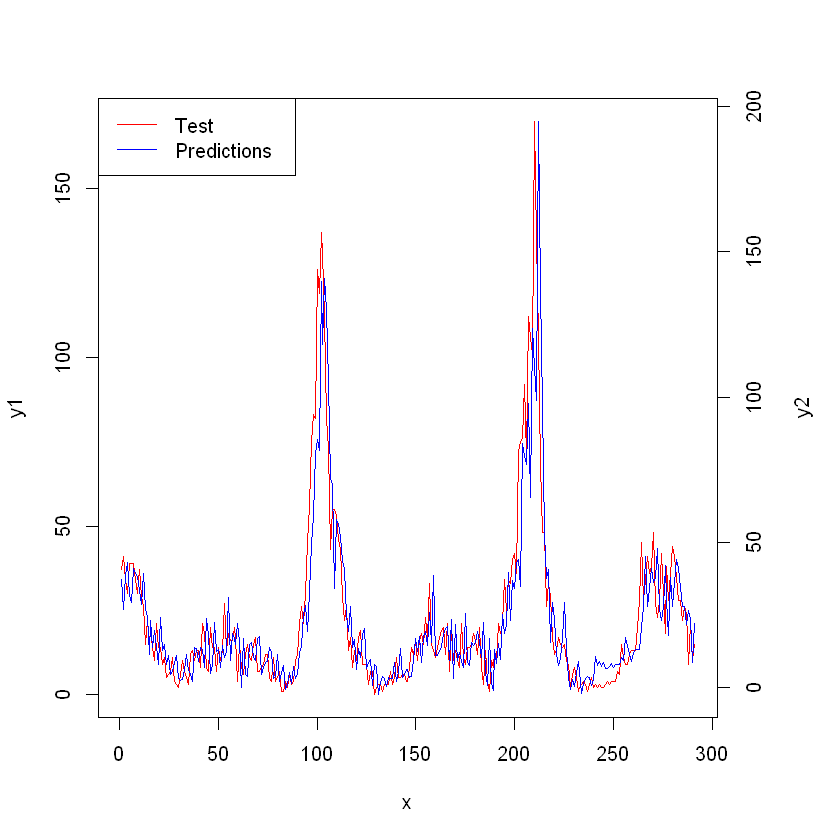

In [8]:

x <- 1:endIndex
y1 <- test
y2 <- predictions
par(mar=c(5,4,4,5)+.1)
plot(x,y1,type="l",col="red")
par(new=TRUE)
plot(x, y2,,type="l",col="blue",xaxt="n",yaxt="n",xlab="",ylab="")
axis(4)
mtext("y2",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Test","Predictions"))

In [9]:
library(MLmetrics)
mse = MSE(predictions, test)
mse


Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall



[1] 179.4582